In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/AI_Advanced_CK/NLP/2_IMDB_reviews')

## Dataset

In [6]:
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete48UC6P/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete48UC6P/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete48UC6P/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [7]:
import numpy as np
train_data, test_data = imdb['train'], imdb['test']
train_sentences = []
test_sentences = []
train_labels = []
test_labels = []

In [ ]:
# first_element = next(iter(train_data.take(1)))

In [8]:
for s,l in train_data:
  train_sentences.append(str(s.numpy()))
  train_labels.append(l.numpy())
for s,l in test_data:
  test_sentences.append(str(s.numpy()))
  test_labels.append(l.numpy())

In [9]:
print(len(train_sentences))
print(len(train_labels))

25000
25000


In [ ]:
# # Thêm phần tử mới vào train_sentences và train_labels
# # s = 'Nguyen Van Manh'
# s = 'Nguyễn Văn Mạnh'
# train_sentences.append(s)
# l = 1
# train_labels = np.append(train_labels, l)

# print(train_sentences[-1])
# print(train_labels[-1])

Nguyễn Văn Mạnh
1


In [ ]:
# print(len(train_sentences))
# print(len(train_labels))
# print(train_sentences[0])
# print(train_labels[0])
# print(train_labels) # label chỉ có 2 nhãn : 0 và 1

25001
25001
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
0
[0 0 0 ... 0 1 1]


In [10]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

## Parameters

In [11]:
vocab_size = 10000
embedding = 64
max_length = 256
embedding_dim = 128  # Kích thước vector nhúng

## Tokenizer

In [ ]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Thử nghiệm với các giá trị khác nhau của vocab_size
# vocab_sizes = [5000, 10000, 20000]

# for vocab_size in vocab_sizes:
#     tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
#     tokenizer.fit_on_texts(train_sentences)

#     # Chuyển đổi các câu thành các chuỗi số
#     train_sequences = tokenizer.texts_to_sequences(train_sentences)

#     # Đệm các chuỗi để có độ dài bằng nhau
#     padded_sequences = pad_sequences(train_sequences, maxlen=100, padding='post')

#     print(f"Vocabulary Size: {vocab_size}")
#     print(f"Example of padded sequences: {padded_sequences[:2]}")
#     print(f"Number of unique tokens: {len(tokenizer.word_index)}")
#     print("-" * 50)

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer (num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts (train_sentences + test_sentences + ['Nguyễn Văn Hoàng Phúc'])

In [13]:
train_sentences_seq = tokenizer.texts_to_sequences(train_sentences)
padded_train_sentences = pad_sequences (train_sentences_seq, maxlen=max_length, truncating='post', padding='post')

In [14]:
word_index = tokenizer.word_index
len(tokenizer.word_index)

120810

In [15]:
print(word_index['romance'])

900


In [16]:
# Từ index lấy ra word
reverse_word_index = {index: word for word, index in word_index.items()}
print(reverse_word_index[900])

romance


In [17]:
test_sentences_seq = tokenizer.texts_to_sequences (test_sentences)
padded_test_sentences = pad_sequences(test_sentences_seq, maxlen=max_length, truncating='post', padding='post')

In [18]:
print(len(test_sentences[0]))
print(test_sentences[0])

942
b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come."


In [19]:
padded_test_sentences

array([[  59,   44,   25, ...,    0,    0,    0],
       [  59,    4,    1, ...,    5,   26,    1],
       [   1,   16,  312, ...,  304,  375, 8339],
       ...,
       [  59,   92,    1, ...,    0,    0,    0],
       [  59,  104,  635, ...,    0,    0,    0],
       [  59,   34,   42, ...,    0,    0,    0]], dtype=int32)

In [20]:
padded_test_sentences.shape

(25000, 256)

In [21]:
print(len(padded_test_sentences[0]))

256


## Model using only one Embedding layer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Flatten
model = Sequential()
model.add(Embedding(vocab_size, embedding, input_length = max_length)) # embedding ở đây chính là output_dim
model.add(Flatten())
# model.add(LSTM(embedding)) # embedding node ẩn ???
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 256, 64)           640000    
                                                                 
 flatten_5 (Flatten)         (None, 16384)             0         
                                                                 
 dense_23 (Dense)            (None, 10)                163850    
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 803861 (3.07 MB)
Trainable params: 803861 (3.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model using Simple RNN

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import SimpleRNN, Dense

# model = Sequential()
# model.add(SimpleRNN(units=embedding, input_shape=(max_length, vocab_size)))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# model.summary()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=embedding, input_length=max_length))
model.add(SimpleRNN(units=128))
model.add(Dense(1, activation='sigmoid'))

# optimizer = Adam(learning_rate=0.001)
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 256, 64)           7731840   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 128)               24704     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 7756673 (29.59 MB)
Trainable params: 7756673 (29.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model using LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, embedding, input_length=max_length))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(10, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
lstm_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 120, 64)           640000    
                                                                 
 lstm_5 (LSTM)               (None, 128)               98816     
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 740117 (2.82 MB)
Trainable params: 740117 (2.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('./Phuc_Save_Model/LSTM_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

# Fit the model
H = lstm_model.fit(padded_train_sentences, train_labels, epochs=10, batch_size=128,
                            validation_data=(padded_test_sentences, test_labels),
                            callbacks=[early_stopping, checkpoint])

# Accessing training history
print("Training History:", H.history)

Epoch 1/10
196/196 [==============================] - ETA: 0s - loss: 0.6753 - acc: 0.5497
Epoch 1: val_loss improved from inf to 0.69410, saving model to ./Phuc_Save_Model/LSTM_model.h5
196/196 [==============================] - 126s 630ms/step - loss: 0.6753 - acc: 0.5497 - val_loss: 0.6941 - val_acc: 0.5000
Epoch 2/10
196/196 [==============================] - ETA: 0s - loss: 0.6921 - acc: 0.5239
Epoch 2: val_loss improved from 0.69410 to 0.69402, saving model to ./Phuc_Save_Model/LSTM_model.h5
196/196 [==============================] - 121s 616ms/step - loss: 0.6921 - acc: 0.5239 - val_loss: 0.6940 - val_acc: 0.5000
Epoch 3/10
196/196 [==============================] - ETA: 0s - loss: 0.6901 - acc: 0.5447
Epoch 3: val_loss improved from 0.69402 to 0.68089, saving model to ./Phuc_Save_Model/LSTM_model.h5
196/196 [==============================] - 121s 620ms/step - loss: 0.6901 - acc: 0.5447 - val_loss: 0.6809 - val_acc: 0.5436
Epoch 4/10
196/196 [==============================] - ET

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout

# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
# model.add(LSTM(64, return_sequences=True, activation='relu'))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

# model.summary()

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout

# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
# model.add(LSTM(units=128, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=128))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# model.summary()

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense

# model = Sequential()
# model.add(Embedding(vocab_size, embedding, input_length=max_length))
# model.add(LSTM(64))  # LSTM layer with 64 units
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# model.summary()

## Model using BiLSTM

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Create BiLSTM model
bilstm_model = Sequential()
bilstm_model.add(Embedding(vocab_size, 128, input_length=max_length))
bilstm_model.add(Bidirectional(LSTM(256)))

bilstm_model.add(Dense(10, activation='relu'))
bilstm_model.add(Dense(1, activation='sigmoid'))

bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bilstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 128)          1280000   
                                                                 
 bidirectional (Bidirection  (None, 512)               788480    
 al)                                                             
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2073621 (7.91 MB)
Trainable params: 2073621 (7.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('./Phuc_Save_Model/BiLSTM_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

# Fit the model
H = bilstm_model.fit(padded_train_sentences, train_labels, epochs=10, batch_size=128,
                            validation_data=(padded_test_sentences, test_labels),
                            callbacks=[early_stopping, checkpoint])

# Accessing training history
print("Training History:", H.history)

Epoch 1/10
196/196 [==============================] - ETA: 0s - loss: 0.5713 - accuracy: 0.6976
Epoch 1: val_loss improved from inf to 0.45462, saving model to ./Phuc_Save_Model/BiLSTM_model.h5
196/196 [==============================] - 36s 154ms/step - loss: 0.5713 - accuracy: 0.6976 - val_loss: 0.4546 - val_accuracy: 0.8058
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


196/196 [==============================] - ETA: 0s - loss: 0.3786 - accuracy: 0.8462
Epoch 2: val_loss improved from 0.45462 to 0.40656, saving model to ./Phuc_Save_Model/BiLSTM_model.h5
196/196 [==============================] - 32s 161ms/step - loss: 0.3786 - accuracy: 0.8462 - val_loss: 0.4066 - val_accuracy: 0.8370
Epoch 3/10
196/196 [==============================] - ETA: 0s - loss: 0.2785 - accuracy: 0.8936
Epoch 3: val_loss improved from 0.40656 to 0.37138, saving model to ./Phuc_Save_Model/BiLSTM_model.h5
196/196 [==============================] - 23s 118ms/step - loss: 0.2785 - accuracy: 0.8936 - val_loss: 0.3714 - val_accuracy: 0.8372
Epoch 4/10
196/196 [==============================] - ETA: 0s - loss: 0.2983 - accuracy: 0.8849
Epoch 4: val_loss did not improve from 0.37138
196/196 [==============================] - 22s 110ms/step - loss: 0.2983 - accuracy: 0.8849 - val_loss: 0.4225 - val_accuracy: 0.8083
Epoch 5/10
196/196 [==============================] - ETA: 0s - loss: 

In [4]:
from tensorflow.keras.models import load_model

# Đường dẫn tới file model đã lưu
model_path = './Phuc_Save_Model/BiLSTM_model.h5'

# Load model
loaded_model = load_model(model_path)

## Training

In [36]:
model = bilstm_model

In [ ]:
# # Callbacks
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# checkpoint = ModelCheckpoint('./Phuc_Save_Model/RNN_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

# # Fit the model
# H = model.fit(padded_train_sentences, train_labels, epochs=10,
#                             validation_data=(padded_test_sentences, test_labels),
#                             callbacks=[early_stopping, checkpoint])

# # Accessing training history
# print("Training History:", H.history)

Epoch 1/10
782/782 [==============================] - ETA: 0s - loss: 0.6945 - acc: 0.5021
Epoch 1: val_loss improved from inf to 0.69530, saving model to ./Phuc_Save_Model/RNN_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 148s 189ms/step - loss: 0.6945 - acc: 0.5021 - val_loss: 0.6953 - val_acc: 0.5044
Epoch 2/10
782/782 [==============================] - ETA: 0s - loss: 0.6925 - acc: 0.5119
Epoch 2: val_loss did not improve from 0.69530
782/782 [==============================] - 142s 181ms/step - loss: 0.6925 - acc: 0.5119 - val_loss: 0.6963 - val_acc: 0.5016
Epoch 3/10
782/782 [==============================] - ETA: 0s - loss: 0.6920 - acc: 0.5176
Epoch 3: val_loss did not improve from 0.69530
782/782 [==============================] - 136s 174ms/step - loss: 0.6920 - acc: 0.5176 - val_loss: 0.6971 - val_acc: 0.5001
Epoch 4/10
782/782 [==============================] - ETA: 0s - loss: 0.6906 - acc: 0.5209
Epoch 4: val_loss did not improve from 0.69530
782/782 [==============================] - 145s 185ms/step - loss: 0.6906 - acc: 0.5209 - val_loss: 0.6986 - val_acc: 0.5007
Training History: {'loss': [0.694536566734314, 0.6925192475318909, 0.6919538974761963,

In [ ]:
# model.fit(padded_train_sentences, train_labels, epochs=10, batch_size=128, validation_data=(padded_test_sentences, test_labels))

In [ ]:
# model.fit(padded_train_sentences, train_labels, epochs=10, validation_data= (padded_test_sentences, test_labels))

In [ ]:
!nvidia-smi

Sat May 25 08:32:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0              31W /  70W |   1071MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [24]:
test_sen = ['i hate this movie']
test_seq = tokenizer.texts_to_sequences (test_sen)
padded_test_seq=pad_sequences(test_seq, maxlen = max_length, truncating='post', padding='post')
padded_test_seq

array([[ 11, 748,  12,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [28]:
padded_test_seq.shape

(1, 256)

In [30]:
result = bilstm_model.predict(padded_test_seq)
e = bilstm_model.layers[0]
weights = e.get_weights()[0]
weights.shape # (10000, 64) thì 64 chính là embeding

1/1 [==============================] - 0s 23ms/step


(10000, 128)

In [31]:
print(result)

[[0.522057]]


In [ ]:
# import io
# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')

In [33]:
# Test the model with an additional sentence
additional_test_sen = ['it is so bad']   #i hate this movie    #this movie is amazing
additional_test_seq = tokenizer.texts_to_sequences(additional_test_sen)
padded_additional_test_seq = pad_sequences(additional_test_seq, maxlen=max_length, truncating='post', padding='post')

# Predict sentiment of the additional test sentence
additional_prediction = bilstm_model.predict(padded_additional_test_seq)

# Round the sentiment prediction to get binary output
binary_prediction = 1 if additional_prediction >= 0.5 else 0
print(f"Binary sentiment prediction for '{additional_test_sen[0]}':", binary_prediction)

1/1 [==============================] - 0s 22ms/step
Binary sentiment prediction for 'it is so bad': 0


WEIGHT

In [34]:
# Tìm trọng số của một từ cụ thể trong từ điển
position = tokenizer.texts_to_sequences (['Phúc'])
weights[position]

array([[[-0.02431167, -0.02312613,  0.00965163,  0.01110167,
          0.01989206,  0.0408017 , -0.02005091, -0.02142466,
         -0.02460083,  0.00125064, -0.00944791,  0.0104093 ,
         -0.01020958, -0.02721294,  0.02764709, -0.00203785,
         -0.00297573,  0.0208701 ,  0.00766472, -0.00133603,
         -0.00317382,  0.04525804, -0.03870283, -0.03113294,
          0.02178061,  0.01972376, -0.00636315,  0.01208876,
         -0.04510084,  0.0114382 , -0.02744121, -0.00337358,
         -0.02418035, -0.03428954, -0.0423298 , -0.00251351,
         -0.00880035, -0.01409585, -0.04994943, -0.00138565,
          0.00780286, -0.01895193,  0.0100949 ,  0.02274312,
          0.02860136, -0.02182332, -0.01015261,  0.02163506,
          0.02469104,  0.0043133 ,  0.00686643,  0.01126338,
         -0.01168069, -0.02232192,  0.04934732,  0.03107951,
         -0.01201947, -0.01773332, -0.011531  , -0.0502535 ,
         -0.0299677 ,  0.04937193,  0.02762377,  0.02080056,
          0.03031583,  0

## Kết quả


- Model only Embedding layer được 0.85 sau 4 epochs, acc_train 1
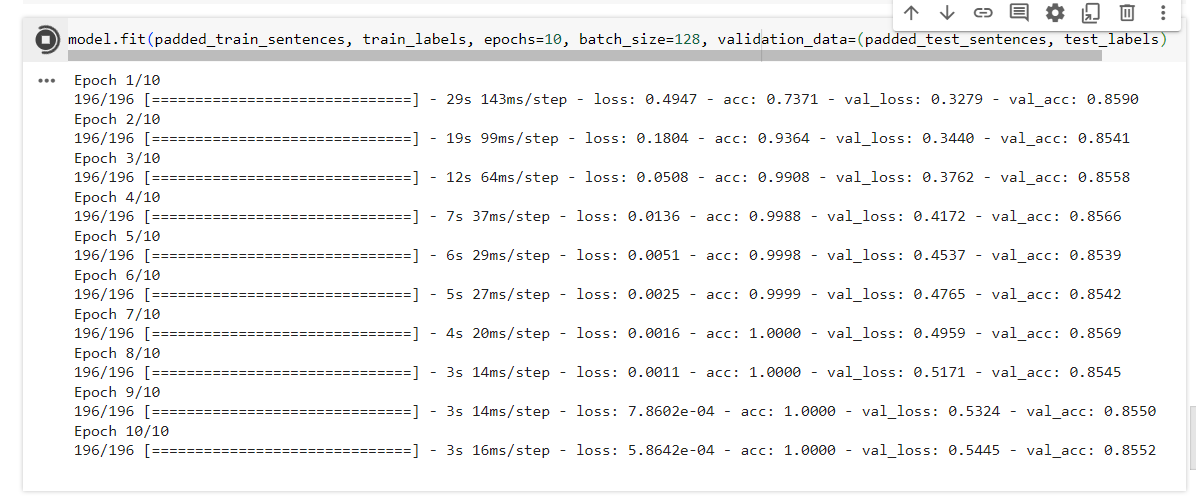

# Test

## Write TSV

In [37]:
e = model.layers[0]
weights = e.get_weights()[0]
weights.shape # (10000, 64)

(10000, 128)

In [38]:
import io
out_v = io.open('./Phuc_Save_Model/vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('./Phuc_Save_Model/meta.tsv', 'w', encoding = 'utf-8')
for idx in range(1, vocab_size):
  word = tokenizer.index_word[idx]
  vector = weights[idx]
  out_m.write(word + '\n')
  out_v.write('\t'.join([str(x) for x in vector]) + '\n')
out_m.close()
out_v.close()

## Predict

In [39]:
# Test the model with an additional sentence
additional_test_sen = ['this movie is amazing']
additional_test_seq = tokenizer.texts_to_sequences(additional_test_sen)
padded_additional_test_seq = pad_sequences(additional_test_seq, maxlen=max_length, truncating='post', padding='post')
print(padded_additional_test_seq)
print(padded_additional_test_seq.shape)

# Predict sentiment of the additional test sentence
additional_prediction = model.predict(padded_additional_test_seq)

# Round the sentiment prediction to get binary output
binary_prediction = 1 if additional_prediction >= 0.5 else 0
print("Binary sentiment prediction for 'this movie is amazing':", binary_prediction)

[[ 12  16   7 503   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

## Weight

In [51]:
word = 'văn'

if word in tokenizer.word_index:
    position = tokenizer.texts_to_sequences([word])
    print(position)
    text = tokenizer.sequences_to_texts(position)
    print(text)
    weights = model.layers[0].get_weights()[0]
    print(weights[position])
else:
    print("Từ '{}' không có trong từ điển.".format(word))


[[1]]
['<OOV>']
[[[-0.02431167 -0.02312613  0.00965163  0.01110167  0.01989206
    0.0408017  -0.02005091 -0.02142466 -0.02460083  0.00125064
   -0.00944791  0.0104093  -0.01020958 -0.02721294  0.02764709
   -0.00203785 -0.00297573  0.0208701   0.00766472 -0.00133603
   -0.00317382  0.04525804 -0.03870283 -0.03113294  0.02178061
    0.01972376 -0.00636315  0.01208876 -0.04510084  0.0114382
   -0.02744121 -0.00337358 -0.02418035 -0.03428954 -0.0423298
   -0.00251351 -0.00880035 -0.01409585 -0.04994943 -0.00138565
    0.00780286 -0.01895193  0.0100949   0.02274312  0.02860136
   -0.02182332 -0.01015261  0.02163506  0.02469104  0.0043133
    0.00686643  0.01126338 -0.01168069 -0.02232192  0.04934732
    0.03107951 -0.01201947 -0.01773332 -0.011531   -0.0502535
   -0.0299677   0.04937193  0.02762377  0.02080056  0.03031583
    0.01227439  0.00479022  0.02841387  0.01887215  0.02547644
   -0.01341306 -0.01331699  0.03530414 -0.04270877 -0.01981734
   -0.01208789  0.00440793 -0.00780123  0.0

## Embedings Từ

In [52]:
word = 'nguyễn'

modelx = Sequential()
modelx.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

if word in tokenizer.word_index:
    position = tokenizer.texts_to_sequences([word])
    print(f"Chỉ số của từ '{word}':", position[0][0])
    print("Chuỗi chứa chỉ số của từ:", position)
    embedding_of_word = modelx.predict(position)
    print(f"Embedding của từ '{word}':", embedding_of_word)

else:
    print("Từ '{}' không có trong từ điển.".format(word))

Chỉ số của từ 'nguyễn': 1
Chuỗi chứa chỉ số của từ: [[1]]
1/1 [==============================] - 0s 46ms/step
Embedding của từ 'nguyễn': [[[-1.74942389e-02  2.94507258e-02  1.80772878e-02 -4.65555675e-02
   -2.06543449e-02 -1.82832405e-03 -2.65419018e-02  1.25105716e-02
    2.26705708e-02  2.97727622e-02 -4.49185483e-02 -9.24907625e-04
   -4.17091139e-02 -4.17680033e-02 -3.21136601e-02  2.10432149e-02
    2.15955637e-02 -8.76597315e-03 -4.87891324e-02  1.09879859e-02
   -1.09828115e-02  9.12420824e-03  4.02596034e-02  3.27482931e-02
   -3.83473746e-02  2.34036110e-02  4.23407815e-02  1.89770013e-04
   -2.33281255e-02  9.68171284e-03 -4.29445505e-02 -7.71844387e-03
   -1.41442902e-02  2.51815431e-02 -3.25332172e-02  2.09256150e-02
   -4.06670570e-02  1.39427893e-02 -4.80761789e-02 -1.87542327e-02
   -2.56326087e-02  3.63111496e-04  2.12857984e-02 -7.73904473e-03
    3.24877538e-02  2.03749575e-02  4.23628800e-02  1.87543966e-02
    2.53221281e-02  2.99585201e-02  1.10227689e-02 -3.69190

## Embedings Câu

In [53]:
additional_test_sen = ["nguyễn văn mạnh là ai vậy ?"]
additional_test_seq = tokenizer.texts_to_sequences(additional_test_sen)
padded_additional_test_seq = pad_sequences(additional_test_seq, maxlen=max_length, truncating='post', padding='post')
print("Chuỗi chứa chỉ số của câu:", padded_additional_test_seq)

# Predict sentiment of the additional test sentence
modelx = Sequential()
modelx.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

# Lấy embedding của chuỗi
embeddings = modelx.predict(padded_additional_test_seq)
print("Embeddings:", embeddings)

Chuỗi chứa chỉ số của câu: [[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]]
1/1 [==============================] - 0s 31ms/step
Embeddings: [[[ 0.00278123  0.01182054 -0.01351515 ...  0.04874332 -0.02117405
   -0.03894795]
  [ 0.00278123  0.01182054 -0.01351515 ...  0.04874332 -0.02117405
   -0.03894795]
  [ 0.00278123  0.01182054 -0.01351515 ...  0.04874332 -0.02117405
   -0.03894795]
  ...
  [ 0.04127279 -0.00049116  0.03282942 ...  0.01489128 -0.01204703
    0.01463245]
  [ 0.04127279 -0.00049116  0.03282942 ..